EDA - BANK MAREKTING CAMPAIGN

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

1. DATA COLLECTION

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


2. EXPLORE & CLEAN DATA

In [5]:
# 2.1: DIMENSIONS ➞ (rows, columns)
df.shape

(41188, 21)

In [6]:
# 2.2: DATA TYPES & NON-NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# TRANSFORM 'UNKNOWN' AND 'NONEXISTENT' IN NaN → TO FILL THEM IN AND ENABLE PROCESSING
df.replace(['unknown', 'nonexistent'], np.nan, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df.isna().sum()[df.isna().sum()>0]

job            330
marital         80
education     1731
default       8597
housing        990
loan           990
poutcome     35563
dtype: int64

In [9]:
# 2.3: FIND & DELETE DUPLICATES
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# 2.4: DELETE IRRELEVANT INFO. & DEAL WITH NA VALUES
df.drop(columns=["previous", "contact", "month", "day_of_week", "duration"], axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,1,999,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.isna().sum().sort_values(ascending=False) / len(df)

poutcome          0.863391
default           0.208762
education         0.042015
housing           0.024043
loan              0.024043
job               0.008014
marital           0.001943
age               0.000000
campaign          0.000000
pdays             0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

In [12]:
# FILL-IN NA VALUES
df["poutcome"].fillna(df["poutcome"].mode()[0], inplace = True)
df["default"].fillna(df["default"].mode()[0], inplace = True)
df["education"].fillna(df["education"].mode()[0], inplace = True)
df["housing"].fillna(df["housing"].mode()[0], inplace = True)
df["loan"].fillna(df["loan"].mode()[0], inplace = True)
df["job"].fillna(df["job"].mode()[0], inplace = True)
df["marital"].fillna(df["marital"].mode()[0], inplace = True)

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
pdays             0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

3. UNIVARIATE VARIABLE ANALYSIS

3.1. DIVE DATASET INTO CATEGORICAL AND NUMERICAL

In [13]:
# FEATURE TYPES
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [14]:
# DIVIDE DF BY NUMERICAL AND CATEGORICAL
num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

In [15]:
df_cat.head()

,job,marital,education,default,housing,loan,poutcome,y
0,housemaid,married,basic.4y,no,no,no,failure,no
1,services,married,high.school,no,no,no,failure,no
2,services,married,high.school,no,yes,no,failure,no
3,admin.,married,basic.6y,no,no,no,failure,no
4,services,married,high.school,no,no,yes,failure,no


3.2. CATEGORICAL VARIABLE ANALYSIS

/tmp/ipykernel_631/2317340745.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_631/2317340745.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_631/2317340745.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


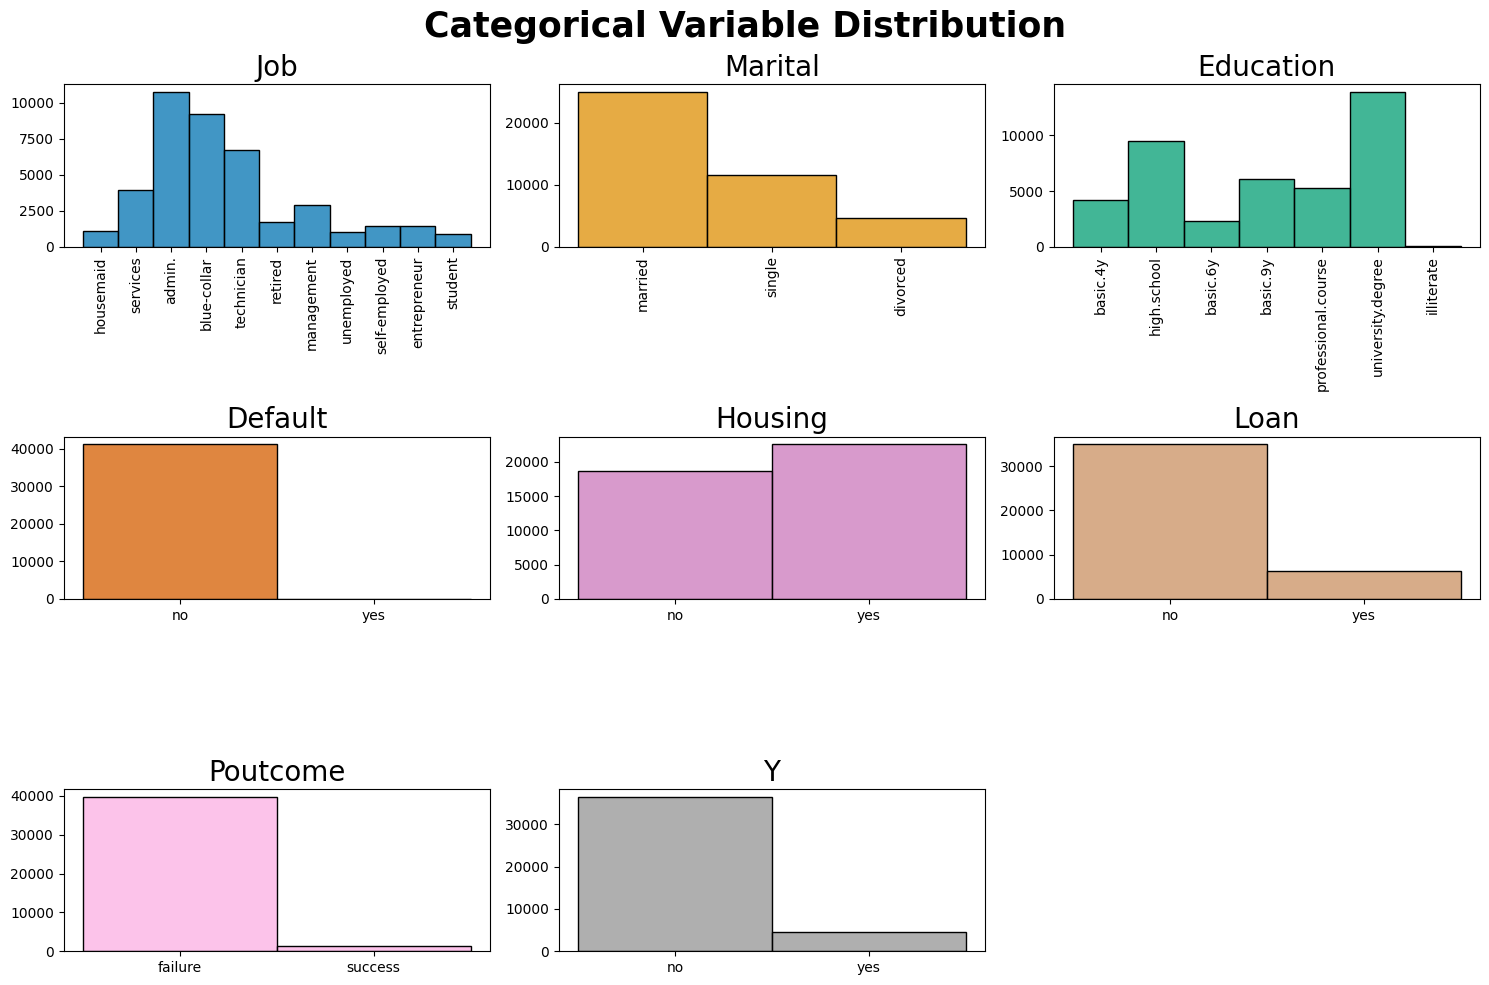

In [33]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Categorical Variable Distribution", fontsize=25, fontweight='bold')

categories = [
    ("job", 0, 0),
    ("marital", 0, 1),
    ("education", 0, 2),
    ("default", 1, 0),
    ("housing", 1, 1),
    ("loan", 1, 2),
    ("poutcome", 2, 0),
    ("y", 2, 1),
]

for i, (col, row, col_pos) in enumerate(categorias):
    ax = axis[row, col_pos]  # Correct indexing here
    sns.histplot(data=df_cat, x=col, ax=ax, color=sns.color_palette("colorblind")[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=20)
    
    if col in ["job", "marital", "education"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()


3.3. NUMERICAL VARIABLE ANALYSIS

In [34]:
df_num.head()

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,1.1,93.994,-36.4,4.857,5191.0


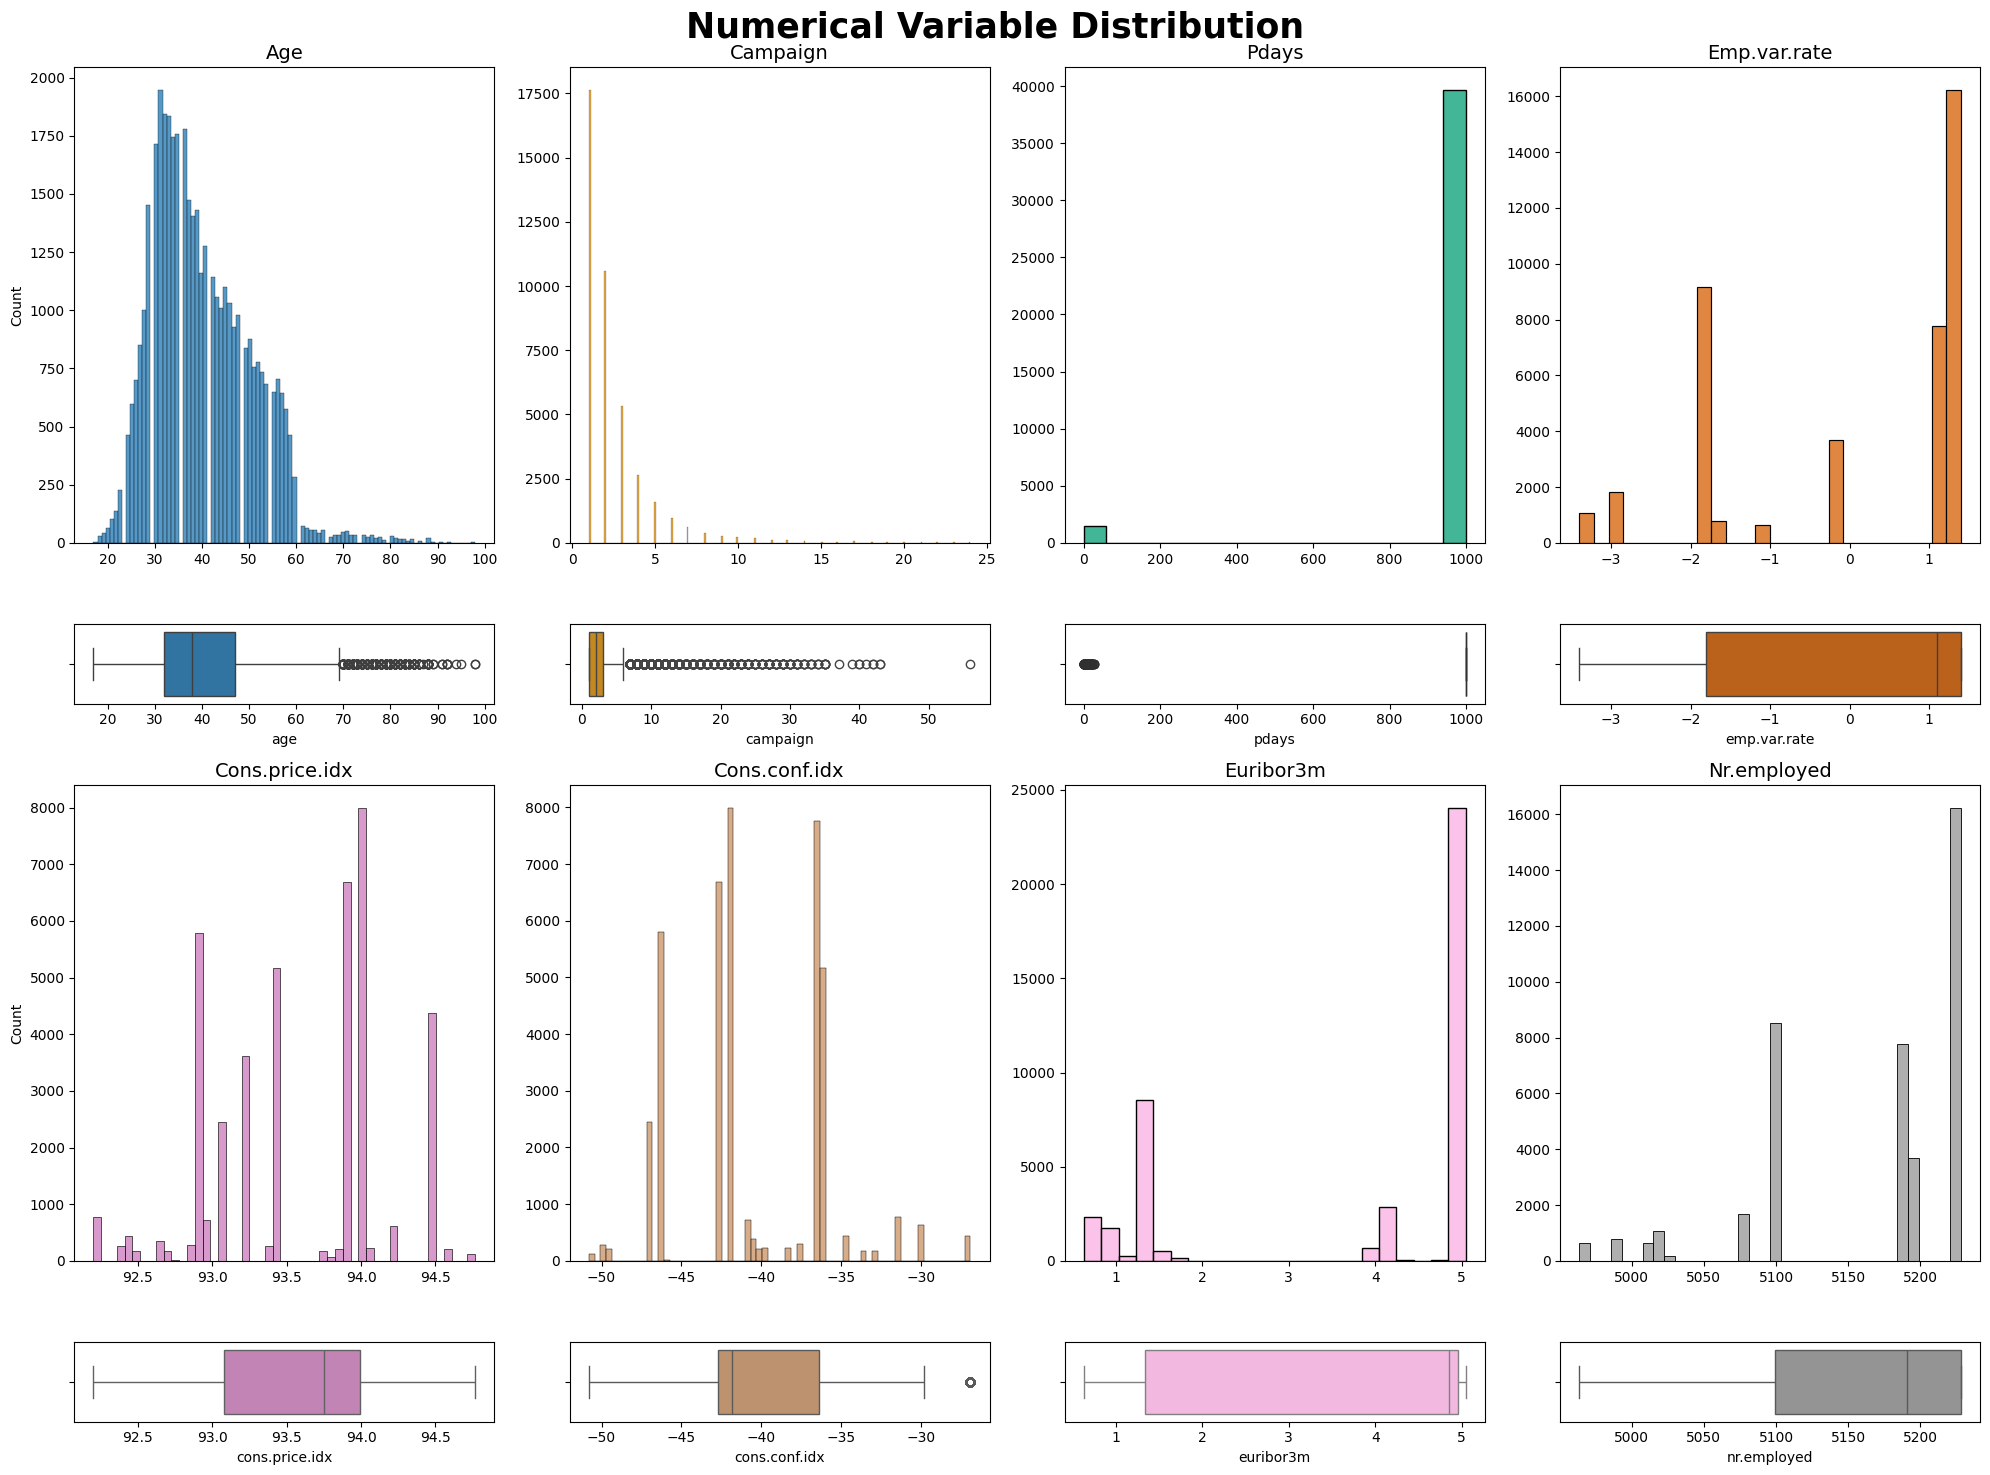

In [41]:
fig, axis = plt.subplots(4, 4, figsize = (20, 15), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Numerical Variable Distribution", fontweight='bold', fontsize=25)

# HISTOGRAM & BOXPLOT
sns.histplot(ax = axis[0, 0], data = df_num, x = "age").set(xlabel = None)
axis[0, 0].set_title("Age", fontsize=14)
sns.boxplot(ax = axis[1, 0], data = df_num, x = "age")

sns.histplot(ax = axis[0, 1], data = df_num[df_num["campaign"] < 25], x = "campaign", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
axis[0, 1].set_title("Campaign", fontsize=14)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "campaign", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num, x = "pdays", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
axis[0, 2].set_title("Pdays", fontsize=14)
sns.boxplot(ax = axis[1, 2], data = df_num, x = "pdays", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = df_num, x = "emp.var.rate", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
axis[0, 3].set_title("Emp.var.rate", fontsize=14)
sns.boxplot(ax = axis[1, 3], data = df_num, x = "emp.var.rate", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = df_num, x = "cons.price.idx", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
axis[2, 0].set_title("Cons.price.idx", fontsize=14)
sns.boxplot(ax = axis[3, 0], data = df_num, x = "cons.price.idx", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = df_num, x = "cons.conf.idx", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
axis[2, 1].set_title("Cons.conf.idx", fontsize=14)
sns.boxplot(ax = axis[3, 1], data = df_num, x = "cons.conf.idx", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = df_num, x = "euribor3m", color=sns.color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
axis[2, 2].set_title("Euribor3m", fontsize=14)
sns.boxplot(ax = axis[3, 2], data = df_num, x = "euribor3m", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = df_num, x = "nr.employed", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
axis[2, 3].set_title("Nr.employed", fontsize=14)
sns.boxplot(ax = axis[3, 3], data = df_num, x = "nr.employed", color=sns.color_palette("colorblind")[7])

plt.tight_layout()
plt.show()